<a href="https://colab.research.google.com/github/sejalpatra-git/Grover-s-Algorithm-/blob/main/Grover's_Algorithm_(Qiskit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***GROVER'S ALGORITHM IMPLEMENTATION USING QISKIT***

**Grover’s algorithm** is a quantum algorithm designed to find a desired item in an unstructured search space more efficiently than any classical method by using the principles of superposition and interference. It begins by placing all possible states into an equal superposition so that every candidate solution has the same probability, then applies an **oracle** that “marks” the correct solution by flipping its phase without revealing it directly. Next, a process called the **diffusion (or amplitude amplification) operator** reflects all probability amplitudes about their average, which increases the amplitude (and hence the measurement probability) of the marked state while decreasing the others. By repeatedly applying the oracle and diffusion steps approximately √N times for a search space of size N, the algorithm progressively amplifies the probability of the correct answer. When the quantum state is finally measured, the marked item appears with very high probability, giving Grover’s algorithm its quadratic speedup over classical brute-force search while remaining optimal for unstructured problems.


# **FOR 2 QUBITS-**

We want to find the target state — |11⟩ — among all 4 possible states: |00⟩, |01⟩, |10⟩, and |11⟩.


**Step 1: Initialization and Creating the Circuit**

qc = QuantumCircuit(2, 2)


We create a quantum circuit with 2 quantum bits (qubits) and 2 classical bits for measurement.

The qubits hold the quantum states, classical bits store the measurement results.


**Step 2: Superposition (Hadamard Gates)**

qc.h([0, 1])




Each qubit is put into a superposition state by the Hadamard (H) gate.

Instead of being just |0⟩ or |1⟩, each qubit becomes a 50-50 mix of |0⟩ and |1⟩.

Together, the 2 qubits represent all 4 possible states equally (like being in all boxes at once).



**Step 3: Oracle — Mark the Target State**

qc.cz(0, 1)


The oracle’s job is to “mark” the correct answer, in our case, the state |11⟩.

It does this by flipping the phase (sign) of |11⟩ — changing it from +1 to -1.

This phase flip is invisible in measurement but crucial for the algorithm to recognize the target later.


**Step 4: Diffusion Operator — Amplify the Target**

qc.h([0, 1])

qc.x([0, 1])

qc.h(1)

qc.cx(0, 1)

qc.h(1)

qc.x([0, 1])

qc.h([0, 1])



The diffusion operator reflects the amplitudes of all states around their average amplitude.

This step increases the probability amplitude of the marked state and reduces others.

It’s sometimes called the “inversion about the mean.”

By amplifying the marked state’s amplitude, when we measure, it becomes much more likely to appear.

**Step 5: Measurement**

qc.measure([0, 1], [0, 1])


The quantum state collapses to one of the classical states (00, 01, 10, 11).

This step converts the quantum information into classical bits we can read.

Measurement gives us a concrete answer after the quantum processing.

**Step 6: Running the Circuit on a Simulator**

backend = Aer.get_backend('qasm_simulator')

job = backend.run(qc, shots=1024)

result = job.result()

counts = result.get_counts()


The circuit runs 1024 times (shots) to collect statistics.

Because measurement is probabilistic, multiple runs help us see which state is most likely.

Running many times smooths out randomness and shows the success probability.

**Step 7: Viewing Results**

plot_histogram(counts)


The histogram visually shows how often each state appeared.

The target state (11) should have the highest bar.

This visual confirms that Grover’s algorithm found the marked state by making it appear most frequently.

# *Installing Qiskit -*

In [1]:
!pip install qiskit qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.9 MB/s eta 0:00:00


# *Running a uniform superposition without using Grover's algorithm -*


It shows how all the 4 possible outcomes have almost equal probability.

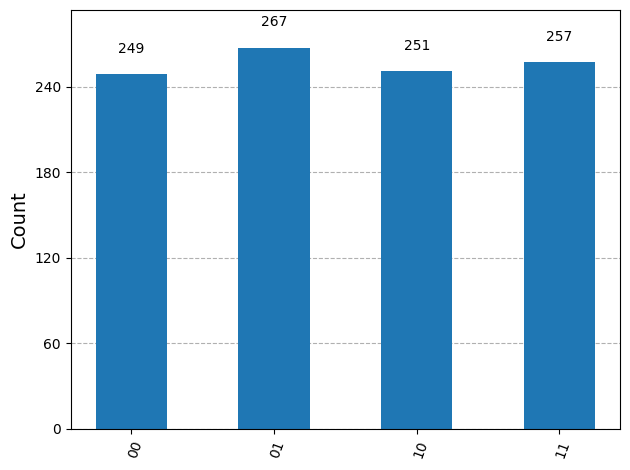

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# 2 qubits, 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: Put all qubits into superposition
qc.h([0, 1])

# Step 2: Measure
qc.measure([0, 1], [0, 1])

# Step 3: Run simulation
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 4: Plot histogram
plot_histogram(counts)


# *Using Grover's Algorithm -*

It shows that |11⟩ has highest chance of occuring.



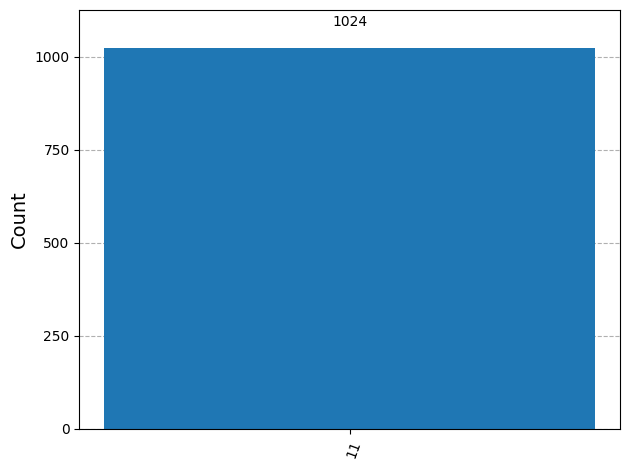

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create circuit
qc = QuantumCircuit(2, 2)

# Superposition
qc.h([0, 1])

# Oracle (mark |11>)
qc.cz(0, 1)

# Diffusion operator
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

# Measurement
qc.measure([0, 1], [0, 1])

# Run simulation
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

counts

plot_histogram(counts)

# *Code for target state — |00⟩ -*

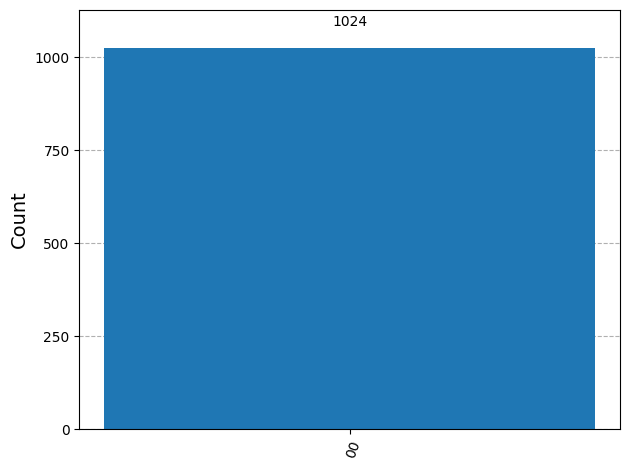

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create a 2-qubit quantum circuit with 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 1: Put both qubits into superposition (equal chance of all states)
qc.h([0, 1])

# Step 2: Oracle to mark |00>
qc.x([0, 1])      # Flip both qubits so |00> acts like |11>
qc.cz(0, 1)       # Phase flip on |11> (original |00>)
qc.x([0, 1])      # Flip back to original states

# Step 3: Diffusion operator (amplifies the marked state)
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Step 5: Run the circuit on the qasm simulator
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 6: Show the measurement results as a histogram
plot_histogram(counts)


# *Code for target state — |10⟩ -*

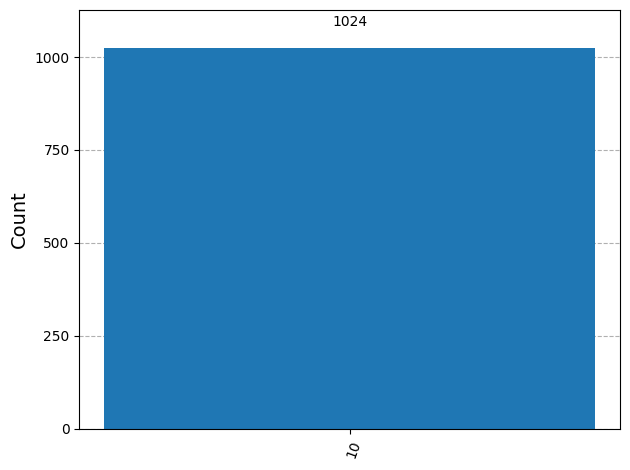

In [9]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)
qc.h([0, 1])          # Superposition

# Oracle for |01>
qc.x(0)
qc.cz(0, 1)
qc.x(0)

# Diffusion operator
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

qc.measure([0, 1], [0, 1])  # Measurement

backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)


# *Code for target state — |01⟩ -*





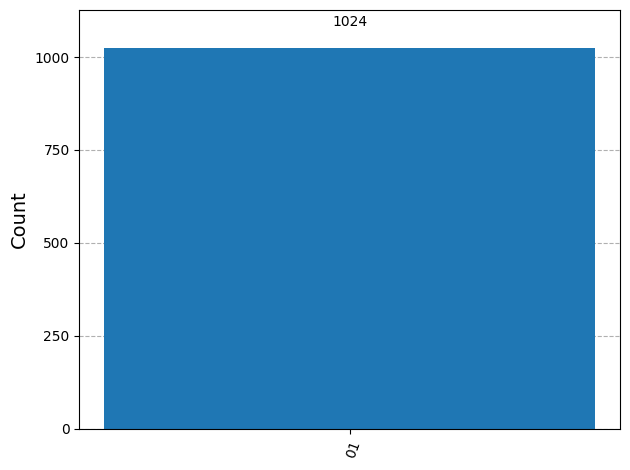

In [10]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(2, 2)
qc.h([0, 1])          # Superposition

# Oracle for |10>
qc.x(1)
qc.cz(0, 1)
qc.x(1)

# Diffusion operator
qc.h([0, 1])
qc.x([0, 1])
qc.h(1)
qc.cx(0, 1)
qc.h(1)
qc.x([0, 1])
qc.h([0, 1])

qc.measure([0, 1], [0, 1])  # Measurement

backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)


# **FOR 3 QUBITS -**

We want to find the target state — |101⟩ — among all 8 possible states.

**Step 1: Install & import**

We load Qiskit so we can build and run a quantum circuit.

**Step 2: Create the circuit**

3 qubits = 8 possible answers, 3 classical bits to store the result.

**Step 3: Superposition**

Hadamard gates put all 8 states in an equal mix.

**Step 4: Oracle**

The oracle flips the sign of 101 so it can be recognized.

**Step 5: Diffusion**

This step makes 101 more likely than the others.

**Step 6: Measurement**

Quantum states collapse into 0s and 1s we can read.

**Step 7: Run the simulator**

We run it 1024 times to see a clear pattern.

**Step 8: Plot the graph**

The tallest bar shows the answer Grover found.

# Applying Grover's Algorithm -

Code for the target state — |101⟩ -

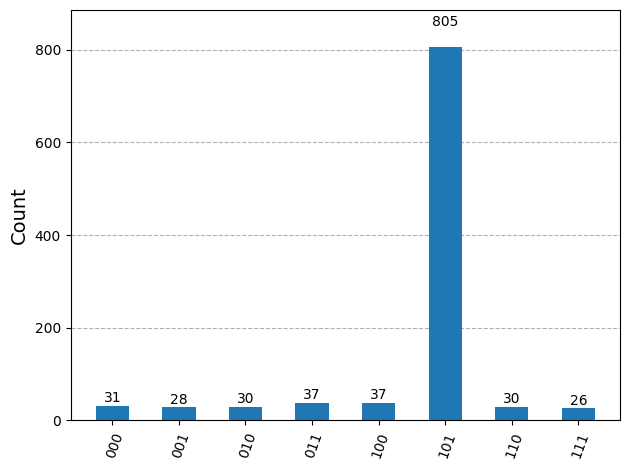

In [7]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create circuit
qc = QuantumCircuit(3, 3)

# Superposition
qc.h([0, 1, 2])

# Oracle for |101>
qc.x(1)
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)
qc.x(1)

# Diffusion operator
qc.h([0, 1, 2])
qc.x([0, 1, 2])
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)
qc.x([0, 1, 2])
qc.h([0, 1, 2])

# Measurement
qc.measure([0, 1, 2], [0, 1, 2])

# Run on simulator
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

counts

plot_histogram(counts)